## 잔차의 해석

In [1]:
import pandas
from statsmodels.formula.api import ols

In [2]:
child = pandas.read_csv('child.csv')

In [3]:
child.head()

,Aggression,Television,Computer_Games,Sibling_Aggression,Diet,Parenting_Style
0,0.374160,0.172671,0.141907,-0.328216,-0.110303,-0.279034
1,0.771153,-0.032872,0.709918,0.576837,-0.022990,-1.248167
2,-0.097728,-0.074460,-0.390141,-0.217184,0.280301,-0.328063
3,0.015935,-0.004427,-0.408080,0.046223,-0.263479,-1.005119
4,-0.275385,-0.675239,-0.277778,-0.891045,0.226581,0.489478


In [12]:
res = ols('Aggression ~ Television', child).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Aggression   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     17.11
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           3.98e-05
Time:                        11:03:29   Log-Likelihood:                -175.93
No. Observations:                 666   AIC:                             355.9
Df Residuals:                     664   BIC:                             364.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0005      0.012     -0.041      0.967      -0.025       0.024
Television     0.1634      0.040      4.137      0.000       0.086       0.241
==============================================================================
Omnibus:                       24.471   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.038
Skew:                           0.108   Prob(JB):                     2.50e-13
Kurtosis:                       4.430   Cond. No.                         3.23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
import seaborn

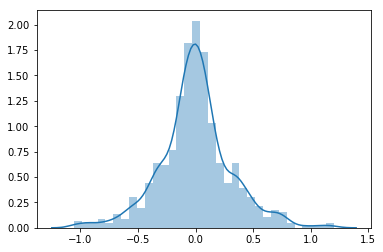

In [16]:
seaborn.distplot(res.resid)  # 잔차

## 다중공선성

In [8]:
child['TV2'] = child['Television']

In [9]:
ols('Aggression ~ Television + TV2', child).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Aggression   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     17.11
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           3.98e-05
Time:                        10:49:02   Log-Likelihood:                -175.93
No. Observations:                 666   AIC:                             355.9
Df Residuals:                     664   BIC:                             364.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0006      0.012     -0.048      0.962      -0.025       0.024
Television     0.0817      0.020      4.137      0.000       0.043       0.120
TV2            0.0817      0.020      4.136      0.000       0.043       0.120
==============================================================================
Omnibus:                       24.471   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.038
Skew:                           0.108   Prob(JB):                     2.50e-13
Kurtosis:                       4.430   Cond. No.                     2.21e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.36e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## 정규화

In [19]:
from sklearn.linear_model import LinearRegression, ElasticNetCV

In [29]:
x = child.iloc[:, 1:6]  # 1번열부터 6번열까지를 x
y = child['Aggression'] # Aggression 열을 y

In [49]:
x.head()

,Television,Computer_Games,Sibling_Aggression,Diet,Parenting_Style
0,0.172671,0.141907,-0.328216,-0.110303,-0.279034
1,-0.032872,0.709918,0.576837,-0.022990,-1.248167
2,-0.074460,-0.390141,-0.217184,0.280301,-0.328063
3,-0.004427,-0.408080,0.046223,-0.263479,-1.005119
4,-0.675239,-0.277778,-0.891045,0.226581,0.489478


### 선형 모형

In [48]:
m1 = LinearRegression()
m1.fit(x, y)
m1.coef_

array([ 0.03291628,  0.14216117,  0.08168417, -0.10905412,  0.0566481 ])

### 엘라스틱넷 + 교차 검증

`l1_ratio`: 교안에서 a, 라쏘(L1), 릿지(L2)

In [50]:
m2 = ElasticNetCV(l1_ratio=[.1, .5, 1], cv=3)  # 3-fold 교차검증
m2.fit(x, y)
m2.coef_

array([ 0.02572348,  0.12471677,  0.0687051 , -0.08714782,  0.05652955])

In [51]:
m2.l1_ratio_  # 

0.1

In [53]:
m2.alpha_  # 람다에 해당하는 부분

0.008882602491363027

## 더미코딩

In [54]:
hsb = pandas.read_csv('hsb2.csv')

In [55]:
hsb.head()  # SES: Socio-Economic Status 사회경제적 수준

,id,female,race,ses,schtyp,prog,read,write,math,science,socst
0,70,0,4,1,1,1,57,52,41,47,57
1,121,1,4,2,1,3,68,59,53,63,61
2,86,0,4,3,1,1,44,33,54,58,31
3,141,0,4,3,1,3,63,44,47,53,56
4,172,0,4,2,1,2,47,52,57,53,61


In [5]:
ols('read ~ C(race)', hsb).fit().summary() # C(): 범주형 변수를 표시하여 더미 코딩 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   read   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     5.964
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           0.000654
Time:                        01:42:13   Log-Likelihood:                -740.06
No. Observations:                 200   AIC:                             1488.
Df Residuals:                     196   BIC:                             1501.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       46.6667      2.019     23.117      0.000      42.685      50.648
C(race)[T.2]     5.2424      3.601      1.456      0.147      -1.859      12.344
C(race)[T.3]     0.1333      2.994      0.045      0.965      -5.772       6.038
C(race)[T.4]     7.2575      2.179      3.330      0.001       2.959      11.556
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.702
Skew:                           0.147   Prob(JB):                        0.259
Kurtosis:                       2.512   Cond. No.                         8.25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### pandas.get_dummies

In [77]:
race = pandas.get_dummies(hsb['race'], prefix='race')  # 변수명 앞에 race라고 붙여라

In [78]:
new = pandas.concat([hsb, race], axis=1)  # hsb와 dummy를 이어붙임(concat)

In [79]:
new

,id,female,race,ses,schtyp,prog,read,write,math,science,socst,race_1,race_2,race_3,race_4
0,70,0,4,1,1,1,57,52,41,47,57,0,0,0,1
1,121,1,4,2,1,3,68,59,53,63,61,0,0,0,1
2,86,0,4,3,1,1,44,33,54,58,31,0,0,0,1
3,141,0,4,3,1,3,63,44,47,53,56,0,0,0,1
4,172,0,4,2,1,2,47,52,57,53,61,0,0,0,1
5,113,0,4,2,1,2,44,52,51,63,61,0,0,0,1
6,50,0,3,2,1,1,50,59,42,53,61,0,0,1,0
7,11,0,1,2,1,2,34,46,45,39,36,1,0,0,0
8,84,0,4,2,1,1,63,57,54,58,51,0,0,0,1
9,48,0,3,2,1,2,57,55,52,50,51,0,0,1,0


In [80]:
ols('read ~ race_2 + race_3 + race_4', new).fit().summary()  # race1이 기준 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   read   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     12.47
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           0.000515
Time:                        15:04:38   Log-Likelihood:                -742.69
No. Observations:                 200   AIC:                             1489.
Df Residuals:                     198   BIC:                             1496.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.9953      2.436     18.059      0.000      39.191      48.800
race           2.4008      0.680      3.531      0.001       1.060       3.742
==============================================================================
Omnibus:                        5.294   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                3.685
Skew:                           0.183   Prob(JB):                        0.158
Kurtosis:                       2.445   Cond. No.                         13.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### .replace로 컬럼값 바꾸기

In [85]:
hsb['race2'] = hsb['race'].replace({1: '_흑', 2: '백', 3: '황', 4: '기타'})

In [86]:
ols('read ~ C(race2)', hsb).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   read   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     5.964
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           0.000654
Time:                        15:08:36   Log-Likelihood:                -740.06
No. Observations:                 200   AIC:                             1488.
Df Residuals:                     196   BIC:                             1501.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         46.6667      2.019     23.117      0.000      42.685      50.648
C(race2)[T.기타]     7.2575      2.179      3.330      0.001       2.959      11.556
C(race2)[T.백]      5.2424      3.601      1.456      0.147      -1.859      12.344
C(race2)[T.황]      0.1333      2.994      0.045      0.965      -5.772       6.038
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.702
Skew:                           0.147   Prob(JB):                        0.259
Kurtosis:                       2.512   Cond. No.                         8.25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
hsb['schtyp2'] = hsb['schtyp'] - 1

In [94]:
ols('read ~ ses + ses:schtyp2', hsb).fit().summary()  # ses:schtyp2 -> 상호작용

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   read   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     9.376
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           0.000129
Time:                        15:50:04   Log-Likelihood:                -739.71
No. Observations:                 200   AIC:                             1485.
Df Residuals:                     197   BIC:                             1495.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      43.7565      2.104     20.799      0.000      39.608      47.905
ses             4.0600      0.987      4.114      0.000       2.114       6.006
ses:schtyp2     0.3568      0.822      0.434      0.665      -1.265       1.979
==============================================================================
Omnibus:                        6.259   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                3.603
Skew:                           0.108   Prob(JB):                        0.165
Kurtosis:                       2.379   Cond. No.                         7.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
hsb.head()

,id,female,race,ses,schtyp,prog,read,write,math,science,socst,race2,schtyp2
0,70,0,4,1,1,1,57,52,41,47,57,기타,0
1,121,1,4,2,1,3,68,59,53,63,61,기타,0
2,86,0,4,3,1,1,44,33,54,58,31,기타,0
3,141,0,4,3,1,3,63,44,47,53,56,기타,0
4,172,0,4,2,1,2,47,52,57,53,61,기타,0


In [104]:
ols('write ~ read + female:read', hsb).fit().summary()  # female:read -> 상호작용

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  write   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     73.90
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           1.13e-24
Time:                        16:24:05   Log-Likelihood:                -677.12
No. Observations:                 200   AIC:                             1360.
Df Residuals:                     197   BIC:                             1370.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      23.2004      2.654      8.741      0.000      17.966      28.434
read            0.5144      0.050     10.218      0.000       0.415       0.614
female:read     0.0961      0.019      5.000      0.000       0.058       0.134
==============================================================================
Omnibus:                        7.827   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                4.749
Skew:                          -0.201   Prob(JB):                       0.0931
Kurtosis:                       2.361   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
ols('write ~ female * read', hsb).fit().summary() 
# 'write ~ read + feamle + read:feamale'

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  write   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     52.31
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           7.00e-25
Time:                        16:33:31   Log-Likelihood:                -674.28
No. Observations:                 200   AIC:                             1357.
Df Residuals:                     196   BIC:                             1370.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      16.5239      3.845      4.297      0.000       8.941      24.107
female         12.4906      5.259      2.375      0.019       2.119      22.863
read            0.6360      0.071      8.907      0.000       0.495       0.777
female:read    -0.1339      0.099     -1.357      0.176      -0.328       0.061
==============================================================================
Omnibus:                        5.511   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                4.075
Skew:                          -0.222   Prob(JB):                        0.130
Kurtosis:                       2.459   Cond. No.                         751.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""